##### 38.	Real-Time Data Visualization (API)

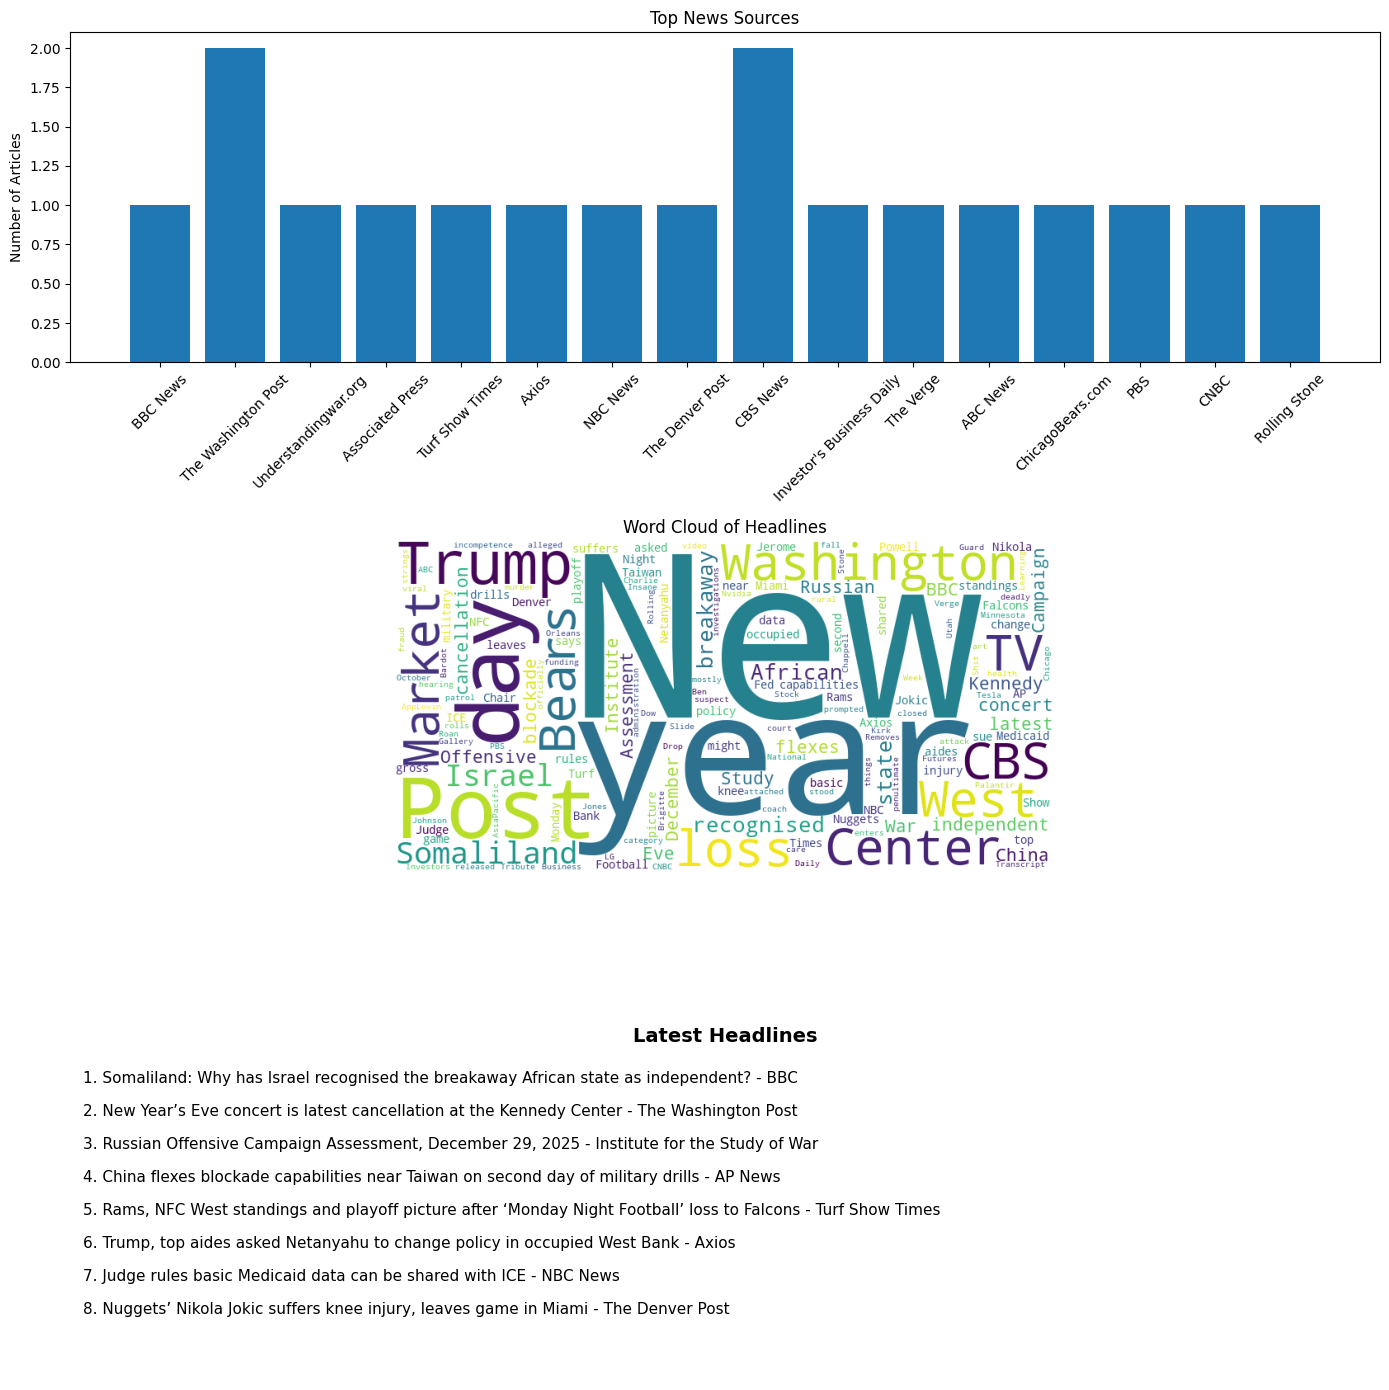

In [ ]:
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import time
import re

API_KEY = "60cb1ec2afb94da9999abb66704452f8"
URL = f"https://newsapi.org/v2/top-headlines?country=us&apiKey={API_KEY}"

def fetch_news():
    response = requests.get(URL)
    data = response.json()
    articles = data.get('articles', [])
    sources = [a['source']['name'] for a in articles if a.get('source')]
    headlines = [a['title'] for a in articles if a.get('title')]
    return sources, headlines

# Interactive mode
plt.ion()

#  3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 14))

for _ in range(10):
    sources, headlines = fetch_news()

    #  Bar Chart (Top Sources)
    ax1.clear()
    source_count = Counter(sources)
    ax1.bar(source_count.keys(), source_count.values())
    ax1.set_title("Top News Sources")
    ax1.set_ylabel("Number of Articles")
    ax1.tick_params(axis='x', rotation=45)

    #  Word Cloud
    ax2.clear()
    text = " ".join(headlines)
    clean_text = re.sub(r'[^\w\s]', '', text)
    wc = WordCloud(width=800, height=400, background_color='white').generate(clean_text)
    ax2.imshow(wc)
    ax2.axis('off')
    ax2.set_title("Word Cloud of Headlines")

    #  Latest Headlines (POINTS)
    ax3.clear()
    ax3.axis('off')
    ax3.set_title("Latest Headlines", fontsize=14, fontweight='bold')

    for i, headline in enumerate(headlines[:8], start=1):  # show top 8
        ax3.text(
            0.01,
            1 - i * 0.1,
            f"{i}. {headline}",
            fontsize=11,
            wrap=True
        )

    plt.tight_layout()

    fig.canvas.draw()
    fig.canvas.flush_events()

    time.sleep(10)

plt.ioff()
plt.show()


In [ ]:
import requests
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud
import base64
from io import BytesIO
import re

API_KEY = "60cb1ec2afb94da9999abb66704452f8"
URL = f"https://newsapi.org/v2/top-headlines?country=us&apiKey={API_KEY}"

# ---------------- FETCH NEWS ----------------
def fetch_news():
    data = requests.get(URL).json()
    articles = data.get("articles", [])

    sources, headlines = [], []
    for a in articles:
        if a.get("title"):
            sources.append(a.get("source", {}).get("name", "Unknown"))
            headlines.append(a["title"])

    return sources, headlines


# ---------------- WORD CLOUD ----------------
def generate_wordcloud(headlines):
    text = re.sub(r"[^\w\s]", "", " ".join(headlines))
    wc = WordCloud(width=600, height=300, background_color="white").generate(text)
    buf = BytesIO()
    wc.to_image().save(buf, format="PNG")
    return "data:image/png;base64," + base64.b64encode(buf.getvalue()).decode()


# ---------------- DASH APP ----------------
app = dash.Dash(__name__)

app.layout = html.Div(
    style={
        "height": "100vh",
        "backgroundColor": "#111",
        "color": "white",
        "padding": "10px",
        "overflow": "hidden"   # NO SCROLL
    },
    children=[
        html.H2("Real-Time News Dashboard", style={"textAlign": "center"}),

        dcc.Interval(id="interval", interval=15000, n_intervals=0),

        html.Div(
            style={
                "display": "grid",
                "gridTemplateColumns": "1fr 1fr",
                "gridTemplateRows": "45vh 35vh",
                "gap": "10px"
            },
            children=[

                #  Bar Chart
                dcc.Graph(
                    id="source-bar-chart",
                    style={"height": "45vh"}
                ),

                #  Word Cloud
                html.Img(
                    id="wordcloud-img",
                    style={
                        "height": "45vh",
                        "width": "100%",
                        "objectFit": "contain",
                        "backgroundColor": "white"
                    }
                ),

                #  Headlines
                html.Div(
                    style={
                        "gridColumn": "1 / span 2",
                        "height": "35vh",
                        "overflow": "hidden"
                    },
                    children=[
                        html.H3("Latest Headlines", style={"textAlign": "center"}),
                        html.Ul(
                            id="headline-list",
                            style={
                                "listStyleType": "disc",
                                "fontSize": "16px",
                                "paddingLeft": "20px"
                            }
                        )
                    ]
                )
            ]
        )
    ]
)


# ---------------- CALLBACK ----------------
@app.callback(
    [Output("source-bar-chart", "figure"),
     Output("wordcloud-img", "src"),
     Output("headline-list", "children")],
    Input("interval", "n_intervals")
)
def update_dashboard(n):
    sources, headlines = fetch_news()

    # Bar chart
    count = Counter(sources)
    fig = px.bar(
        x=list(count.keys()),
        y=list(count.values()),
        title="Top News Sources"
    )
    fig.update_layout(
        plot_bgcolor="#111",
        paper_bgcolor="#111",
        font_color="white",
        margin=dict(l=20, r=20, t=40, b=20)
    )

    # Word cloud
    wc_img = generate_wordcloud(headlines)

    # Headlines (LIMITED = NO SCROLL)
    headline_items = [
        html.Li(h, style={"padding": "6px"}) 
        for h in headlines[:5]
    ]

    return fig, wc_img, headline_items


if __name__ == "__main__":
    app.run(debug=True)


[2026-01-02 19:21:18,355] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connection.py", line 198, in _new_conn
    sock = connection.create_connection(
        (self._dns_host, self.port),
    ...<2 lines>...
        socket_options=self.socket_options,
    )
  File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    raise err
  File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\util\connection.py", line 73, in create_connection
    sock.connect(sa)
    ~~~~~~~~~~~~^^^^
TimeoutError: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

The above exception was the direct cause of the follow